# Ford GoBike Dataset Exploration


## Preliminary Wrangling

> In this project, I'll conduct an exploratory data analysis on a Ford GoBike system dataset in order to explore the dataset's variables and understand the data's structure and relationships. after that, I'll convey the main findings to others through an explanatory analysis.  
> Ford GoBike system dataset provides information about 183412 individual rides made in a bike-sharing system covering San Franciso Bay area.   
The dataset includes variables about the following informations :
> * Ride Duration  
> * Birth Year  
> * Start Station (Name and coordinates)  
> * End Station (Name and coordinates)  
> * User Type (Subscriber, Customer) 



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math as m

%matplotlib inline

> Let's start by Load the dataset and describe its properties. 

In [3]:
#Load Dataset
fordgobike = pd.read_csv('fordgobike_tripdata.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing Data

In [3]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
fordgobike.start_station_id.sample(5)

130115    315.0
73971      66.0
31376     113.0
7565      233.0
57220       3.0
Name: start_station_id, dtype: float64

In [5]:
fordgobike.end_station_id.sample(5)

1105      130.0
154250     99.0
124002     21.0
133209     61.0
13960     324.0
Name: end_station_id, dtype: float64

In [6]:
fordgobike.member_birth_year.sample(5)

23556     1991.0
39239     1977.0
183367    1981.0
108002    1998.0
72254     1998.0
Name: member_birth_year, dtype: float64

In [7]:
fordgobike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [8]:
fordgobike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
fordgobike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [104]:
fordgobike.duplicated().sum()

0

In [9]:
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Quality and Tidiness

Erroneous datatype :
   * start_time and end_time columns are string.
   * start_station_id and end_station_id columns are float64. 
   * member_birth_year columns is float.
   * bike_share_for_all_trip, user_type and member_gender columns are string.  

Null Values :
   * Null values in start_station_id and start_station_name columns.
   * Null values in end_station_id and end_station_name columns
   * Null values in member_birth_year and member_gender columns.

### Cleaning Data

To start, let's create a copy of the original dataframe.

In [5]:
fordgobike_clean = fordgobike.copy()

Erroneous datatype 1 : start_time and end_time are string instead of datatime  

In [12]:
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
fordgobike_clean['end_time'] = pd.to_datetime(fordgobike_clean['end_time'])

In [13]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [14]:
fordgobike_clean['start_time'].sample(5)

34124    2019-02-24 09:00:50.955
171495   2019-02-03 20:22:29.933
65039    2019-02-20 10:11:46.029
105081   2019-02-14 07:47:51.837
1710     2019-02-28 18:38:26.460
Name: start_time, dtype: datetime64[ns]

Erroneous datatype 2 : start_station_id and end_station_id should be int64 instead of float64.

In [6]:
fordgobike_clean['start_station_id'] = fordgobike_clean['start_station_id'].astype('Int64')
fordgobike_clean['end_station_id'] = fordgobike_clean['end_station_id'].astype('Int64')

In [16]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  Int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  Int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [17]:
fordgobike_clean['end_station_id'].sample(5)

163348    363
9769      104
16988     343
179488    126
175101    240
Name: end_station_id, dtype: Int64

Erroneous datatype 3 : convert type of member_birth_year column to int  

In [7]:
fordgobike_clean['member_birth_year'] = fordgobike_clean['member_birth_year'].astype('Int64')

In [19]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  Int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  Int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [20]:
fordgobike_clean['member_birth_year'].value_counts()

1988    10236
1993     9325
1989     8972
1990     8658
1991     8498
        ...  
1930        1
1928        1
1927        1
1878        1
1910        1
Name: member_birth_year, Length: 75, dtype: Int64

Erroneous datatype 4 : bike_share_for_all_trip, user_type and member_gender should be category instead of string.

In [8]:
fordgobike_clean['bike_share_for_all_trip'] = fordgobike_clean['bike_share_for_all_trip'].astype('category')
fordgobike_clean['member_gender'] = fordgobike_clean['member_gender'].astype('category')
fordgobike_clean['user_type'] = fordgobike_clean['user_type'].astype('category')

In [22]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  Int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  Int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

Null Values

In [23]:
fordgobike_clean[fordgobike_clean.start_station_id.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 475 to 181201
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             197 non-null    int64         
 1   start_time               197 non-null    datetime64[ns]
 2   end_time                 197 non-null    datetime64[ns]
 3   start_station_id         0 non-null      Int64         
 4   start_station_name       0 non-null      object        
 5   start_station_latitude   197 non-null    float64       
 6   start_station_longitude  197 non-null    float64       
 7   end_station_id           0 non-null      Int64         
 8   end_station_name         0 non-null      object        
 9   end_station_latitude     197 non-null    float64       
 10  end_station_longitude    197 non-null    float64       
 11  bike_id                  197 non-null    int64         
 12  user_type                197 no

In [27]:
fordgobike_clean[fordgobike_clean.end_station_id.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 475 to 181201
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             197 non-null    int64         
 1   start_time               197 non-null    datetime64[ns]
 2   end_time                 197 non-null    datetime64[ns]
 3   start_station_id         0 non-null      Int64         
 4   start_station_name       0 non-null      object        
 5   start_station_latitude   197 non-null    float64       
 6   start_station_longitude  197 non-null    float64       
 7   end_station_id           0 non-null      Int64         
 8   end_station_name         0 non-null      object        
 9   end_station_latitude     197 non-null    float64       
 10  end_station_longitude    197 non-null    float64       
 11  bike_id                  197 non-null    int64         
 12  user_type                197 no

In [28]:
missing_station = fordgobike_clean[(fordgobike_clean.start_station_id.isnull()) & (fordgobike_clean.end_station_id.isnull())]

In [29]:
missing_station.start_station_latitude.value_counts()

37.41    101
37.40     63
37.42     21
37.39     11
37.38      1
Name: start_station_latitude, dtype: int64

In [34]:
missing_station.end_station_latitude.value_counts()

37.41    98
37.40    65
37.42    18
37.39    13
37.38     2
37.43     1
Name: end_station_latitude, dtype: int64

In [32]:
missing_station.end_station_longitude.value_counts()

-121.94    55
-121.93    50
-121.96    46
-121.95    33
-121.92    11
-121.98     2
Name: end_station_longitude, dtype: int64

In [35]:
missing_station.end_station_longitude.value_counts()

-121.94    55
-121.93    50
-121.96    46
-121.95    33
-121.92    11
-121.98     2
Name: end_station_longitude, dtype: int64

In [33]:
fordgobike_clean[fordgobike_clean.end_station_longitude == -121.94]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
8783,883,2019-02-28 07:58:07.372,2019-02-28 08:12:51.276,<NA>,NaN,37.41,-121.96,<NA>,NaN,37.40,-121.94,4211,Subscriber,1980,Male,No
15298,890,2019-02-27 09:33:32.572,2019-02-27 09:48:23.075,<NA>,NaN,37.41,-121.96,<NA>,NaN,37.41,-121.94,4211,Subscriber,1999,Female,No
16746,1005,2019-02-27 08:00:53.528,2019-02-27 08:17:38.534,<NA>,NaN,37.41,-121.96,<NA>,NaN,37.40,-121.94,4091,Subscriber,1980,Male,No
22306,1123,2019-02-26 08:05:08.632,2019-02-26 08:23:52.033,<NA>,NaN,37.41,-121.96,<NA>,NaN,37.40,-121.94,4239,Subscriber,1980,Male,No
24429,806,2019-02-25 18:11:33.034,2019-02-25 18:24:59.531,<NA>,NaN,37.41,-121.94,<NA>,NaN,37.41,-121.94,4189,Subscriber,1994,Female,Yes
27544,743,2019-02-25 09:26:04.632,2019-02-25 09:38:28.533,<NA>,NaN,37.41,-121.96,<NA>,NaN,37.41,-121.94,4091,Subscriber,1999,Female,No
28942,1035,2019-02-25 08:01:32.069,2019-02-25 08:18:48.067,<NA>,NaN,37.41,-121.96,<NA>,NaN,37.40,-121.94,4239,Subscriber,1980,Male,No
30286,600,2019-02-24 20:48:06.426,2019-02-24 20:58:07.093,<NA>,NaN,37.40,-121.93,<NA>,NaN,37.41,-121.94,4095,Subscriber,1991,Male,No
30726,2447,2019-02-24 18:04:43.530,2019-02-24 18:45:31.466,<NA>,NaN,37.41,-121.95,<NA>,NaN,37.40,-121.94,4141,Subscriber,1977,Male,No
43351,853,2019-02-22 16:34:41.176,2019-02-22 16:48:55.071,<NA>,NaN,37.40,-121.92,<NA>,NaN,37.41,-121.94,4197,Subscriber,1976,Male,No


In [24]:
fordgobike_clean[fordgobike_clean.member_birth_year.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8265 entries, 1 to 183402
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             8265 non-null   int64         
 1   start_time               8265 non-null   datetime64[ns]
 2   end_time                 8265 non-null   datetime64[ns]
 3   start_station_id         8263 non-null   Int64         
 4   start_station_name       8263 non-null   object        
 5   start_station_latitude   8265 non-null   float64       
 6   start_station_longitude  8265 non-null   float64       
 7   end_station_id           8263 non-null   Int64         
 8   end_station_name         8263 non-null   object        
 9   end_station_latitude     8265 non-null   float64       
 10  end_station_longitude    8265 non-null   float64       
 11  bike_id                  8265 non-null   int64         
 12  user_type                8265 no

In [25]:
fordgobike_clean[fordgobike_clean.member_gender.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8265 entries, 1 to 183402
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             8265 non-null   int64         
 1   start_time               8265 non-null   datetime64[ns]
 2   end_time                 8265 non-null   datetime64[ns]
 3   start_station_id         8263 non-null   Int64         
 4   start_station_name       8263 non-null   object        
 5   start_station_latitude   8265 non-null   float64       
 6   start_station_longitude  8265 non-null   float64       
 7   end_station_id           8263 non-null   Int64         
 8   end_station_name         8263 non-null   object        
 9   end_station_latitude     8265 non-null   float64       
 10  end_station_longitude    8265 non-null   float64       
 11  bike_id                  8265 non-null   int64         
 12  user_type                8265 no

In [44]:
fordgobike_clean[fordgobike_clean.member_gender.isnull()].user_type.value_counts()

Subscriber    5028
Customer      3237
Name: user_type, dtype: int64

In [45]:
fordgobike_clean[fordgobike_clean.member_gender.isnull()].bike_share_for_all_trip.value_counts()

No     8265
Yes       0
Name: bike_share_for_all_trip, dtype: int64

The missing values in the columns start_station_id, start_station_name, end_station_id and end_station_name concern exactly the same rows for all cases. By analyze the latitude and longitude for start and station and also the duration, it appeart that the ride started and ended in around the same area.

The missing values in the columns member_birth_year and member_gender refers to member whom are not interest to the Ford GoBike's "Bike Share For All" program. Maybe that expline why they didn't share their personnal informations. 

I prefer to let the null values as they are because I'll need the others non-values of the same rows (where null values exist) in my analysis.

### What is the structure of your dataset?

> There are 183412 individual rides dataset with 16 features :  
> * duration_sec : ride duration.        
> * start_time and end_time : When the ride start and end.
> * start_station_id, start_station_name, start_station_latitude, start_station_longitude : Information about the station where the ride start.            
> * start_station_longitude, end_station_id, end_station_name, end_station_latitude  and end_station_longitude: Information about the station where the ride end.         
> * bike_id, bike_share_for_all_trip : Informations about the bike used in the ride.        
> * user_type, member_birth_year and member_gender :  Informations about the user.  
>
> We have three categoricals variables (user_type, member_gender and bike_share_for_all_trip) and the most other variables are numericals.
               
 

### What is/are the main feature(s) of interest in your dataset?

> The main goal of my investigation is to figure out what are the most population who use the FordGoBike service.

 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help me in my investigation are : gender, member_birth_year, user_type and duration.

## Univariate Exploration

> In this section, investigate distributions of individual variables.

In [157]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  Int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  Int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

I'll start by looking at the distribution of the  duration variable.

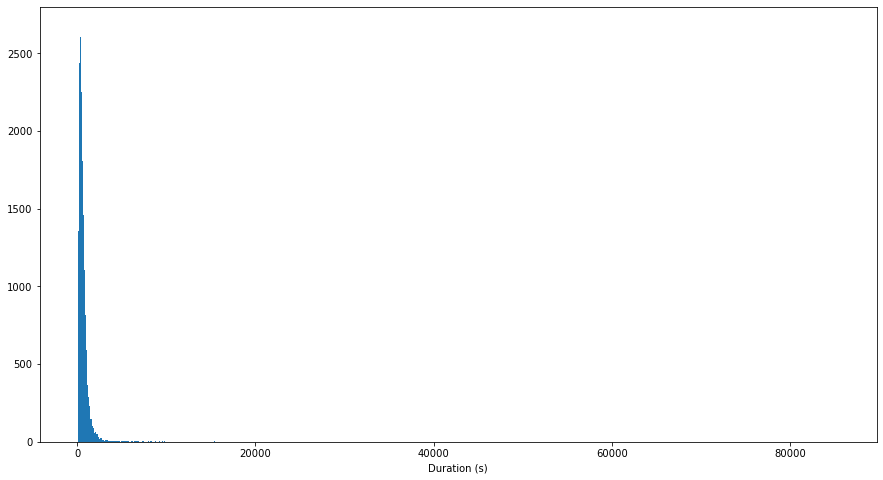

In [37]:
# start with a standard-scaled plot
default_color = sb.color_palette()[0]
plt.figure(figsize=(15, 8))
bins_edge = np.arange(fordgobike_clean.duration_sec.min(), fordgobike_clean.duration_sec.max()+10, 10)
plt.hist(data=fordgobike_clean, x='duration_sec', color=default_color, bins=bins_edge)
plt.xlabel('Duration (s)')
plt.show()

The initial plot of duration show the distribution is unimodal and skewed right. The plot also show that there're some strong outliers on the right. We have to analysis them and see if they need to be filtered out of the data.

In [38]:
# select high outliers based on the plot
high_outliers = fordgobike_clean[fordgobike_clean.duration_sec>20000]
print(len(high_outliers))
high_outliers

215


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
546,22087,2019-02-28 15:05:22.467,2019-02-28 21:13:29.671,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,371,Lombard St at Columbus Ave,37.802746,-122.413579,2761,Customer,<NA>,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176130,59813,2019-02-01 19:54:49.848,2019-02-02 12:31:43.043,60,8th St at Ringold St,37.774520,-122.409449,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,335,Subscriber,1990,Female,No
176987,80891,2019-02-01 11:05:18.976,2019-02-02 09:33:30.169,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55,Webster St at Grove St,37.777053,-122.429558,3133,Customer,<NA>,NaN,No
177144,51488,2019-02-01 17:22:49.870,2019-02-02 07:40:58.473,207,Broadway at Coronado Ave,37.835788,-122.251621,253,Haste St at College Ave,37.866418,-122.253799,847,Subscriber,1997,Male,Yes
177279,30767,2019-02-01 15:44:06.638,2019-02-02 00:16:53.653,62,Victoria Manalo Draves Park,37.777791,-122.406432,63,Bryant St at 6th St,37.775910,-122.402575,1401,Customer,1988,Male,No


In [39]:
# Check if the values are corrects by calcul the difference bteween end_time and start_time
duration_trip = (high_outliers['end_time'] - high_outliers['start_time'])/np.timedelta64(1,'s')
all(duration_trip.astype(np.int64) == high_outliers['duration_sec'])

True

The high outliers appear to be valid values. As a final outlier check, I'll plot the dataset without outlier and see if there is a difference in the distrubition.


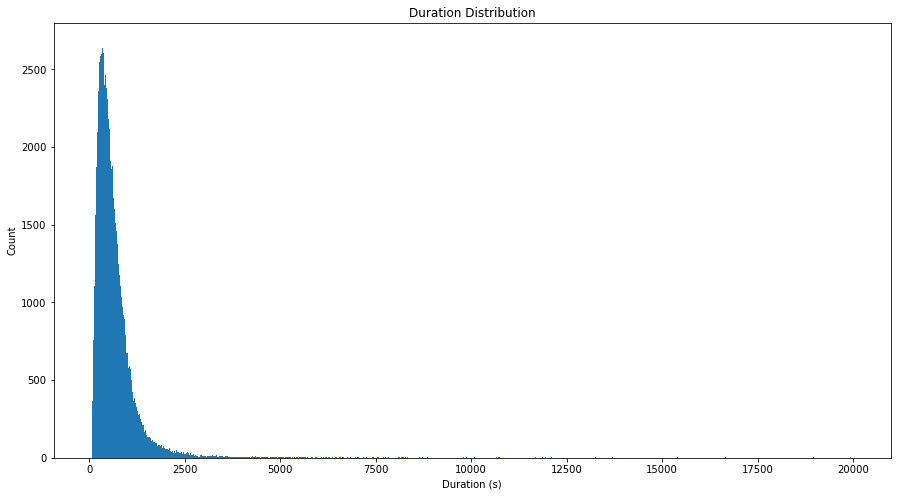

In [166]:
plt.figure(figsize=(15, 8))
no_outliers = fordgobike_clean[fordgobike_clean.duration_sec<20000]
bins_edge = np.arange(no_outliers.duration_sec.min(), no_outliers.duration_sec.max()+10, 10)
plt.hist(data=no_outliers, x='duration_sec', color=default_color, bins=bins_edge)
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Duration Distribution')
plt.show()

The plot show that duration follow a highly skewed distribution with or without high outliers, therefore, I decide to not remove them from the dataset. 

The plot show also that duration has a long-tailed distribution, so I'll plot the log scal instead.

In [41]:
fordgobike_clean.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

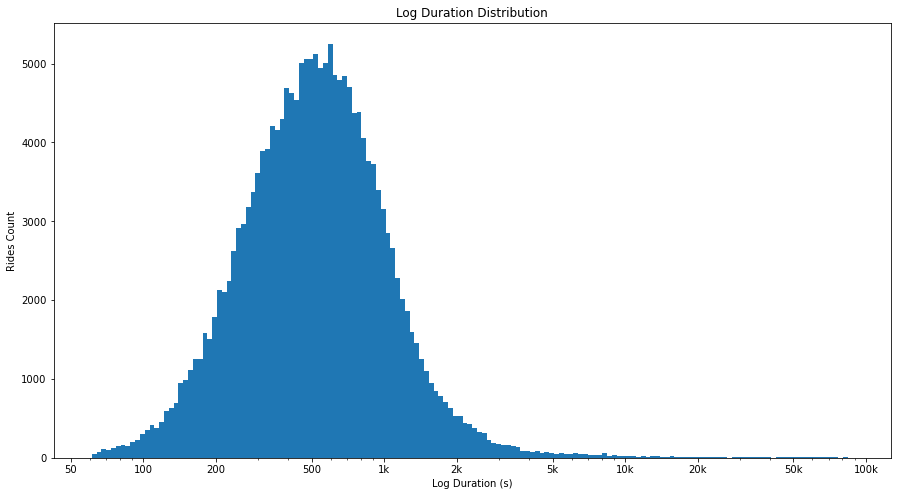

In [177]:
# Plot the log scal
plt.figure(figsize=[15, 8])
bins_edge = 10 ** np.arange(np.log10(fordgobike_clean.duration_sec.min()), 
                            np.log10(fordgobike_clean.duration_sec.max())+0.02, 0.02)
plt.hist(data=fordgobike_clean, x='duration_sec', color=default_color, bins=bins_edge)
plt.xscale('log')
duration_ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.xticks(duration_ticks, [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Log Duration (s)')
plt.ylabel('Rides Count')
plt.title('Log Duration Distribution')
plt.show()

The duration distribution unimodal with one large peak around 500, that mean the most cyclist use the bike for a short duration (500s = 8min20s).

Let move on to see the gender and user type distribution.

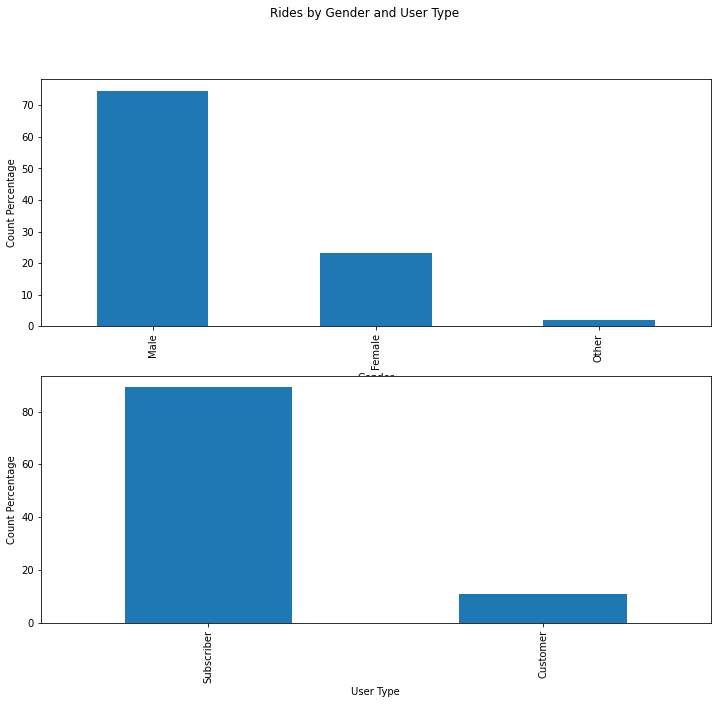

In [173]:
# let's plot gender and user_type together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize=(12, 10))
(fordgobike_clean.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(ax=ax[0])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count Percentage')
(fordgobike_clean.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(ax=ax[1])
ax[1].set_xlabel('User Type')
ax[1].set_ylabel('Count Percentage')
fig.suptitle('Rides by Gender and User Type')
plt.show()

* Male are the most user that taked the bike rides with the percentage 74.9%.
* The users of the type subscriber are the majority who taked bike rides with the percentage of 89.16%.

Let's see the distrubition of age, the age will be calculed based on the member_birth_year column.

In [10]:
# Calcul the age of user, this dataset is taken in 2019
fordgobike_clean['user_age'] = 2019 - fordgobike_clean.member_birth_year
fordgobike_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,No,<NA>


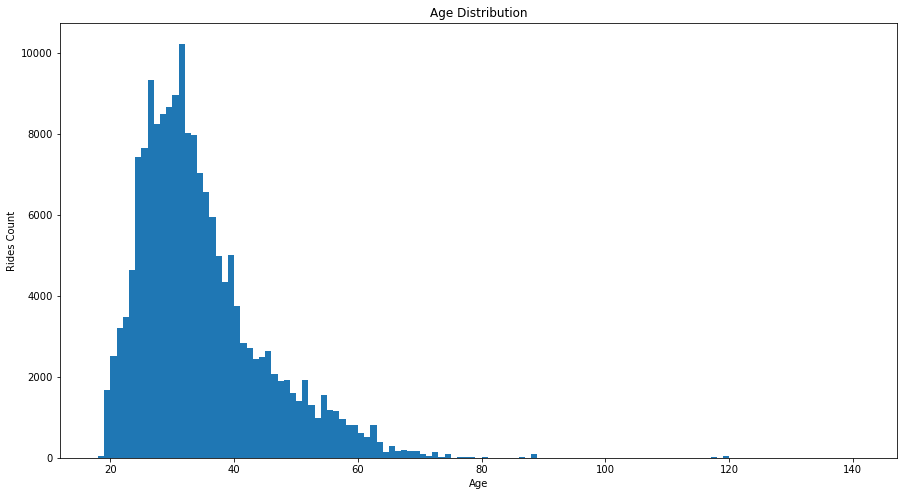

In [176]:
# Plot the age histogram 
plt.figure(figsize=[15, 8])
bins_edge = np.arange(fordgobike_clean.user_age.min(), fordgobike_clean.user_age.max()+1, 1)
df_userage = fordgobike_clean[fordgobike_clean.user_age.notnull()]
plt.hist(data=df_userage, x='user_age', color=default_color, bins=bins_edge)
plt.xlabel('Age')
plt.ylabel('Rides Count')
plt.title('Age Distribution')
plt.show()

The initial plot show that there are high outliers in the dataset, which need to be investigated.

In [52]:
fordgobike_clean.user_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: user_age, dtype: float64

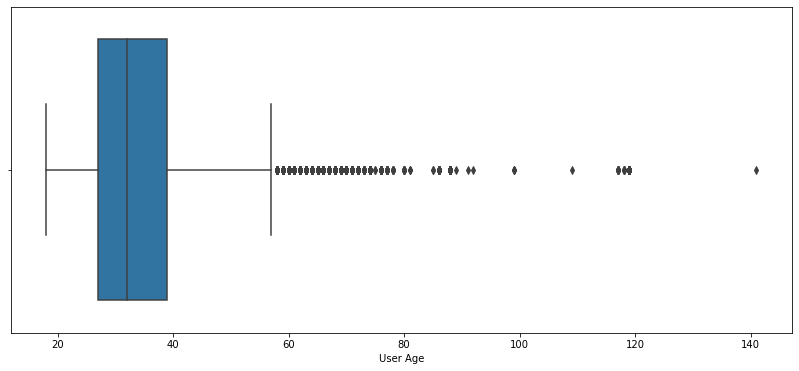

In [53]:
plt.figure(figsize=(14,6))
sb.boxplot(data=fordgobike_clean,  x='user_age', orient='h')
plt.xlabel('User Age')
plt.show()

The boxplot show that outliers start from 60. In age between 60 and 100 it's normal that people suffer from health issues and lack of knowledge about technology, and that explaine why we have a few user in this interval who use Ford GoBike system. Therefore, the outliers that we should investageted is users with age large than 100.

In [54]:
fordgobike_clean[fordgobike_clean.user_age >100].shape

(72, 17)

In [55]:
fordgobike_clean[fordgobike_clean.user_age >100].member_birth_year.value_counts()

1900    53
1902    11
1901     6
1878     1
1910     1
Name: member_birth_year, dtype: Int64

We have 72 high outliers in the dataset. It seem that the most users entered 1900 as their birth day maybe because they didn't want to share their personnal informations or they missed it during the registration process.   
Since it's a mistake, I decide to deal with these high outliers by remove them from the dataset.

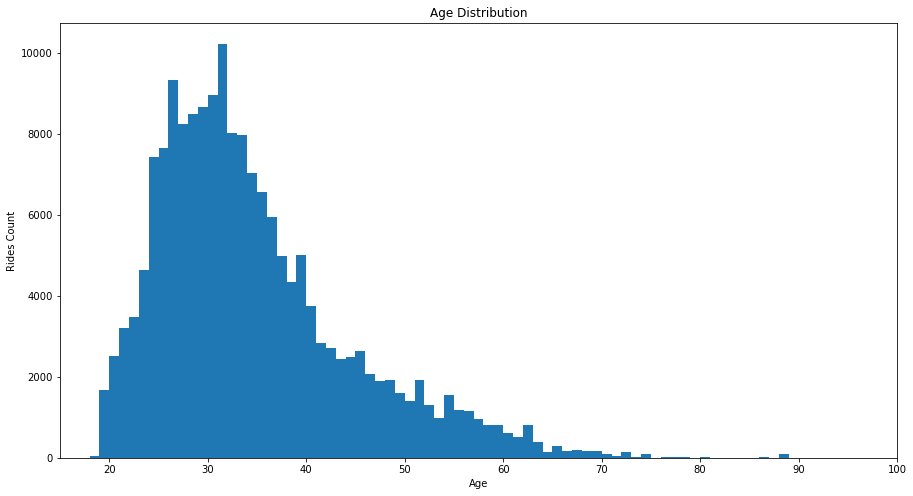

In [175]:
# Plot the age histogram 
plt.figure(figsize=[15, 8])
bins_edge = np.arange(fordgobike_clean.user_age.min(), fordgobike_clean.user_age.max()+1, 1)
df_userage = fordgobike_clean[(fordgobike_clean.user_age.notnull()) & (fordgobike_clean.user_age <100)]
plt.hist(data=df_userage, x='user_age', color=default_color, bins=bins_edge)
plt.xlabel('Age')
plt.ylabel('Rides Count')
plt.title('Age Distribution')
plt.xlim(15, 100)
plt.show()

The age distribution is unimodal and slightly right skewed with one large peak around 32. The most user of Ford GoBike system are the younger people.

Let's plot the top 10 origin stations from where the ride start.

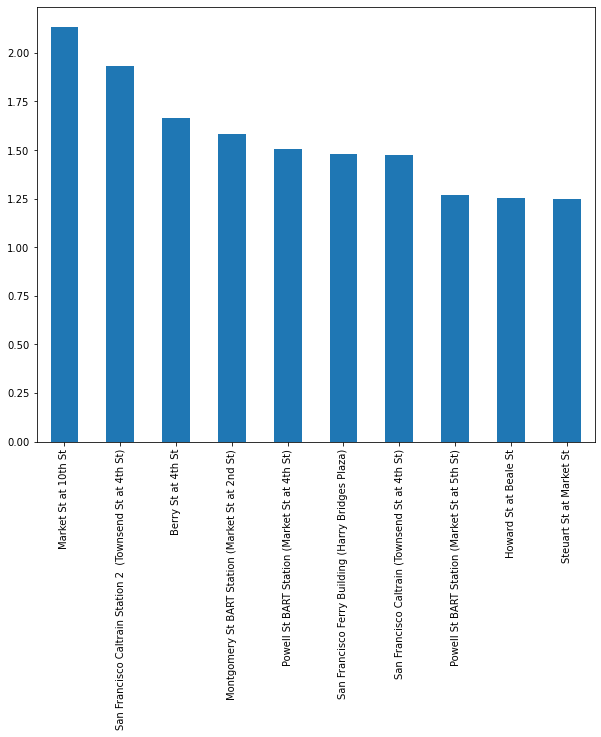

In [57]:
# Plot the top 10 origin/start station
origin = (fordgobike_clean.start_station_name.value_counts(ascending=False, sort=True, normalize=True))*100
origin_top_ten = origin.head(10)
plt.figure(figsize=(10,8))
origin_top_ten.plot.bar()
plt.xticks(rotation=90)
plt.show()

Let's plot the top 10 destination stations from where the ride start.

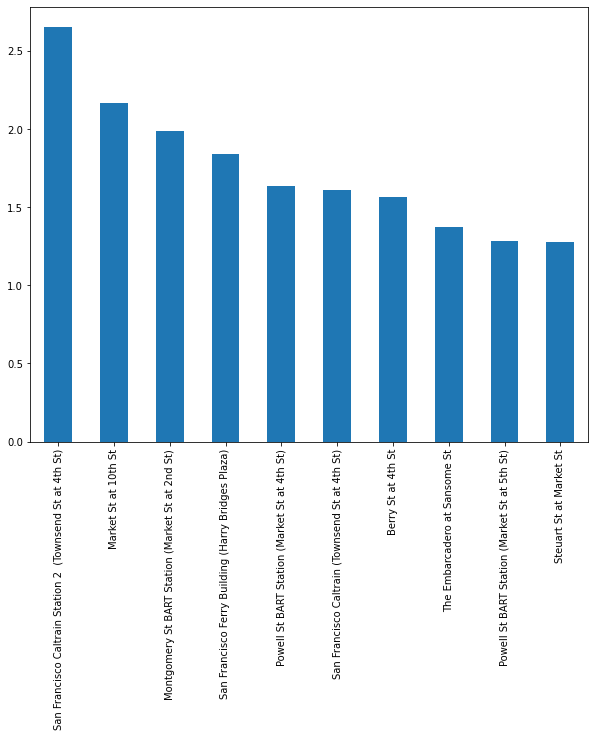

In [58]:
# Plot the top 10 destination station
destination = (fordgobike_clean.end_station_name.value_counts(ascending=False, sort=True, normalize=True))*100
destination_top_ten = destination.head(10)
plt.figure(figsize=(10,8))
destination_top_ten.plot.bar()
plt.xticks(rotation=90)
plt.show()

Let's look at the distribution of rides by time 

In [59]:
fordgobike_clean.start_time.value_counts()

2019-02-01 13:40:09.492    2
2019-02-11 17:05:07.840    2
2019-02-19 17:52:44.175    2
2019-02-01 18:24:34.874    2
2019-02-22 20:11:42.256    2
                          ..
2019-02-22 08:46:15.436    1
2019-02-19 17:29:08.242    1
2019-02-11 10:24:37.610    1
2019-02-20 08:02:52.933    1
2019-02-15 07:01:31.319    1
Name: start_time, Length: 183401, dtype: int64

In [61]:
fordgobike_clean.start_time.dt.day_name()

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: start_time, Length: 183412, dtype: object

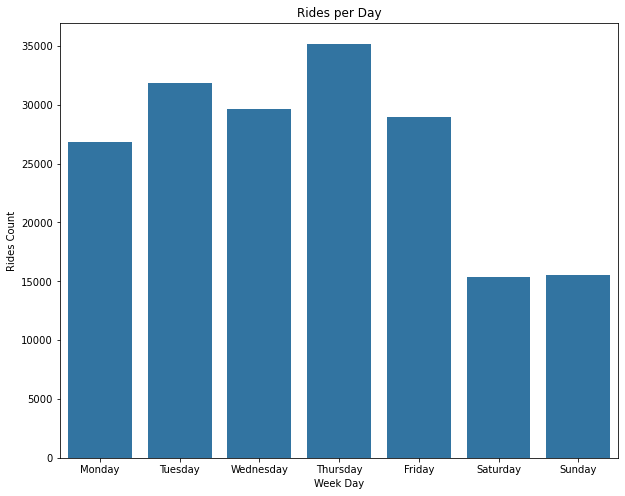

In [178]:
# Plot the distrubtion by week days
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,8))
day = fordgobike_clean.start_time.dt.day_name()
sb.countplot(data=fordgobike_clean,x=day, order=weekday, color=default_color)
plt.xlabel('Week Day')
plt.ylabel('Rides Count')
plt.title('Rides per Day')
plt.show()

I expected that people will use bike on weekend more, but the above plot show the opposite, it appeart that Thursday, Tuesday and Friday are the busiest days. 

In [63]:
fordgobike_clean.start_time.dt.hour

0         17
1         18
2         12
3         17
4         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_time, Length: 183412, dtype: int64

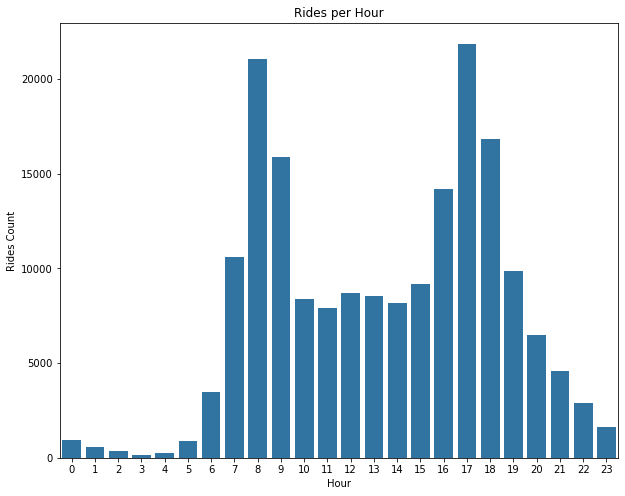

In [179]:
# Plot the distrubtion by hours
plt.figure(figsize=(10,8))
hour = fordgobike_clean.start_time.dt.hour
sb.countplot(data=fordgobike_clean, x=hour, color=default_color)
plt.xlabel('Hour')
plt.ylabel('Rides Count')
plt.title('Rides per Hour')
plt.show()

The above histograme show that 8AM and 5PM are the most hours when users take ride. Mostly it's the time when they go and back from their work.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable took on a large range of values, so I looked at the data using a log transform and changing the x-axis limit. Under the transformations, the duration distribution looked unimodal with one large peak around 500.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After analyze data, I perform some operations on the variables in order to be in more meaningful format :  
> * I calculed the users age based on birthday column. After that, i tidy up the data which have user ages larger than 100 years old.
> * I extracted the week day and hour from Start_time column and plot the histogram to see at which time the users take a ride. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the dataset. 

Let start by looking at the ride distribution by gender and user type

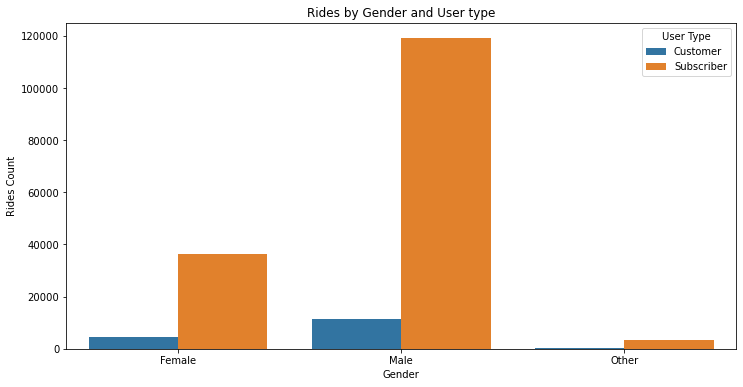

In [180]:
# Plot rides by gender and user type
plt.figure(figsize=(12,6))
sb.countplot(data = fordgobike_clean, x = 'member_gender', hue = 'user_type')
plt.xlabel('Gender')
plt.ylabel('Rides Count')
plt.title('Rides by Gender and User type')
plt.legend(title='User Type')
plt.show()

The plot show that the subcriber male are the most people who use Ford GoBike system.

Let move on to look at the duration distribution by gender and user type.

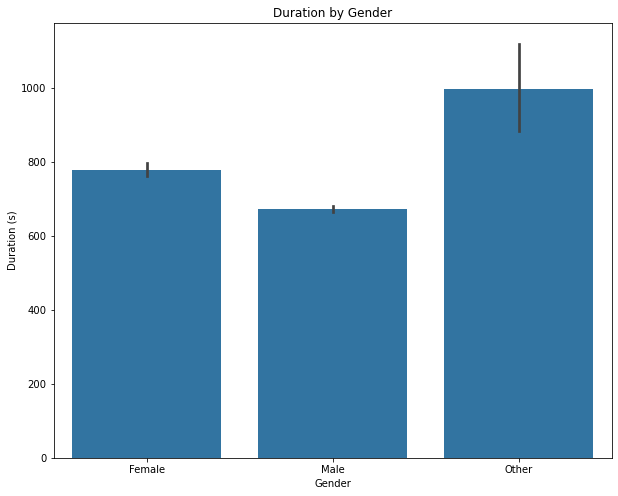

In [181]:
# Plot duration by gender
plt.figure(figsize=(10,8))
sb.barplot(data=fordgobike_clean, x='member_gender', y='duration_sec', color=default_color)
plt.xlabel('Gender')
plt.ylabel('Duration (s)')
plt.title('Duration by Gender')
plt.show()

It's the opposite of what expected, it's seem that Female take a long rides than Male.

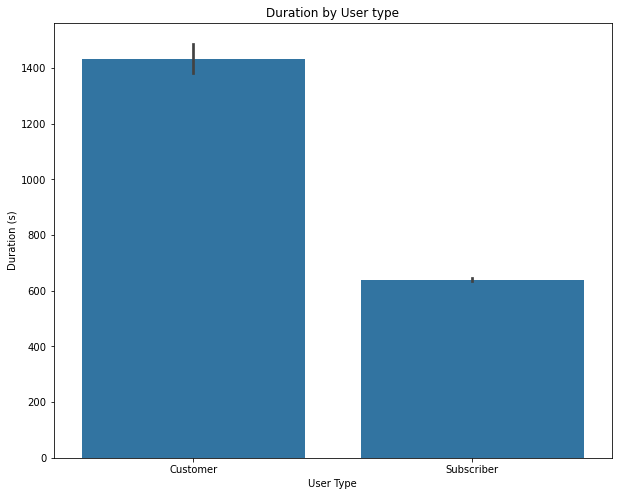

In [182]:
# Plot the duration by user type
plt.figure(figsize=(10,8))
sb.barplot(data=fordgobike_clean, x='user_type', y='duration_sec', color=default_color)
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.title('Duration by User type')
plt.show()

It appear that Customers have long ride thant Subscribers.

Let see the age distribution by gender and by user type.

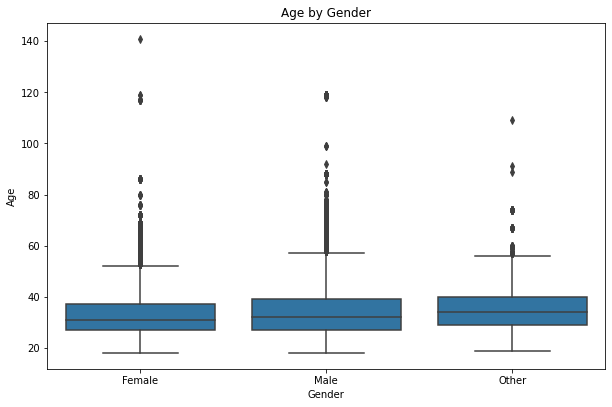

In [184]:
# Plot age by gender 
plt.figure(figsize=(10,14))
df_userage = fordgobike_clean[fordgobike_clean.user_age.notnull()]
plt.subplot(2, 1, 1)
sb.boxplot(data=df_userage, x='member_gender', y='user_age', color=default_color)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender')
plt.show()

It seem that the median age for all genders is around 30. And the majority of users are unders the age of 40.

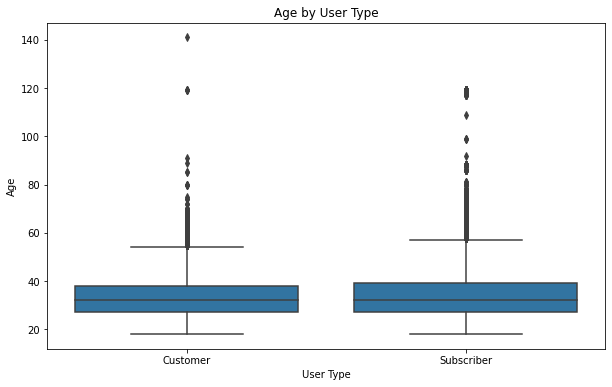

In [13]:
# Plot age by user typer
plt.figure(figsize=(10,6))
df_userage = fordgobike_clean[fordgobike_clean.user_age.notnull()]
sb.boxplot(data=df_userage, x='user_type', y='user_age', color=default_color)
plt.xlabel('User Type')
plt.ylabel('Age')
plt.title('Age by User Type')
plt.show()

The median age Costumer and Subcriber is around 30.

Let see the relationship between ride duration adn user age.

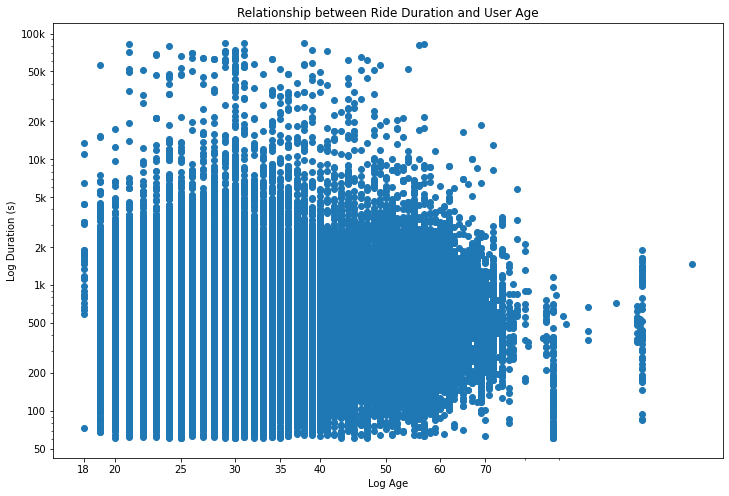

In [188]:
# duration_sec and user_age
plt.figure(figsize=(12,8))
df_userage = fordgobike_clean[fordgobike_clean.user_age.notnull()]
plt.scatter(data=df_userage, x='user_age', y='duration_sec')
plt.yscale('log')
plt.xscale('log')
duration_ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
age_ticks = [18, 20, 25, 30, 35, 40, 50, 60, 70]
plt.yticks(duration_ticks, [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.xticks(age_ticks, age_ticks)
plt.xlabel('Log Age')
plt.ylabel('Log Duration (s)')
plt.title('Relationship between Ride Duration and User Age')
plt.show()

The plot show that more the user age increase more the duration decrease. It seems also that the younger users have the higher duration distribution, the user with age between 23 and 33 take a long rides.

Now let's look at the duration distribution by time.

In [150]:
np.log10(fordgobike_clean.duration_sec.max())

4.931681571347222

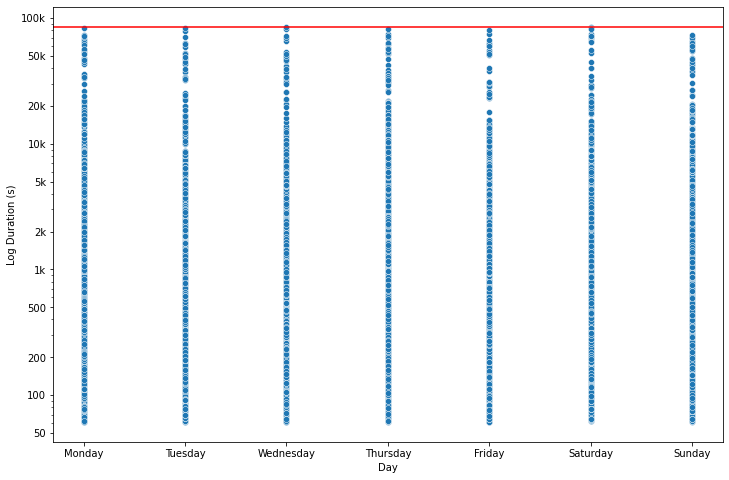

In [154]:
# Plot the duration distribution by week day
plt.figure(figsize=(12,8))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fordgobike_clean['weekday'] = fordgobike_clean.start_time.dt.day_name()
fordgobike_clean['weekday'] = [order.index(x) for x in fordgobike_clean['weekday']]
plt.xticks(range(len(order)), order)
sb.scatterplot(data=fordgobike_clean, x='weekday', y='duration_sec')
plt.yscale('log')
duration_ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.yticks(duration_ticks, [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.axhline(y=fordgobike_clean.duration_sec.max(), color='r', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Log Duration (s)')
plt.show()

It seems that Wednesday and Saturday is the day where user take a long rides.

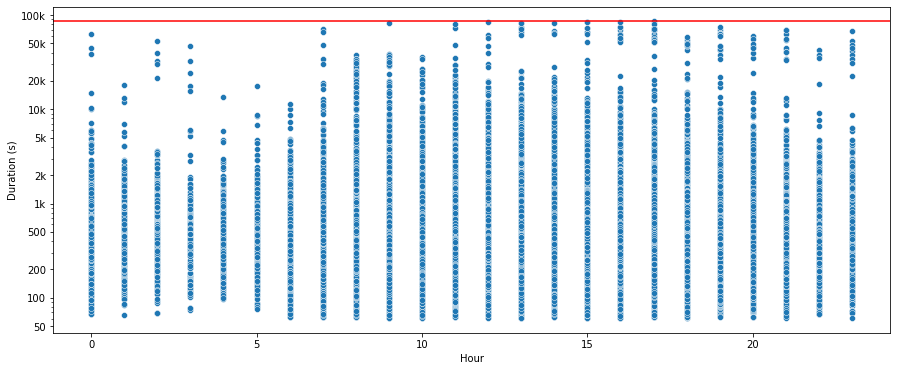

In [155]:
plt.figure(figsize=(15,6))
sb.scatterplot(data=fordgobike_clean, x=fordgobike_clean.start_time.dt.hour, y='duration_sec')
plt.yscale('log')
duration_ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.yticks(duration_ticks, [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.axhline(y=fordgobike_clean.duration_sec.max(), color='r', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Duration (s)')
plt.show()

The plot show that the long rides has being taken between 9AM and 5PM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * The duration and age show a very low correlation.  
> * The rides taken by Female and Costumers are longer than rides taken by male and subscriber.  
> * The age of the majority of user is under 40 years old.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most subcribe to Ford Gobike system are Male.


## Multivariate Exploration

> In this section, investigate the dataset by creating plots of three or more variables.

Let start with the relationship between gender, user type and duration

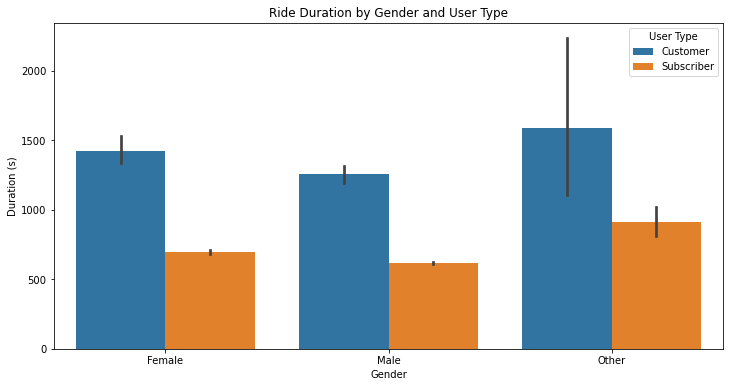

In [187]:
# Plot duration by gender and user type
plt.figure(figsize=(12,6))
sb.barplot(data = fordgobike_clean, x='member_gender', y='duration_sec', hue = 'user_type')
plt.xlabel('Gender')
plt.ylabel('Duration (s)')
plt.title('Ride Duration by Gender and User Type')
plt.legend(title='User Type')
plt.show()

The plot show that Female customer take a long rides than other.

Let move on and see the relationship between gender, user type and age

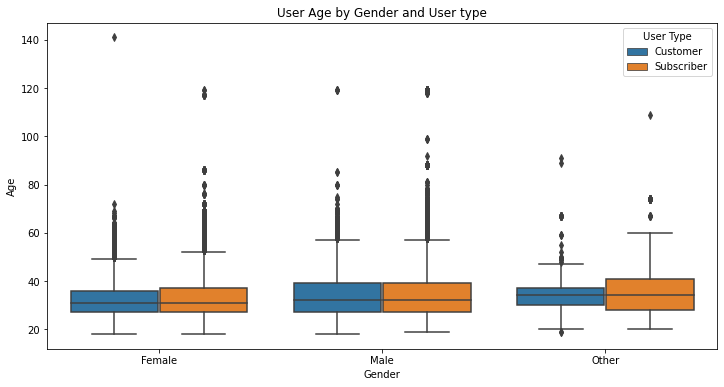

In [189]:
# Plot age bu gender and user type
plt.figure(figsize=(12,6))
sb.boxplot(data = fordgobike_clean, x='member_gender', y='user_age', hue = 'user_type')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('User Age by Gender and User type')
plt.legend(title='User Type')
plt.show()

The age median of user is around 30 and it's the same for all gender and user type.

Relationship between duration, gender and user type

In [ ]:
g = sb.PairGrid(data = fordgobike_clean, y_vars = 'duration_sec', x_vars = categoric_vars,
                size = 3, aspect = 1.5)

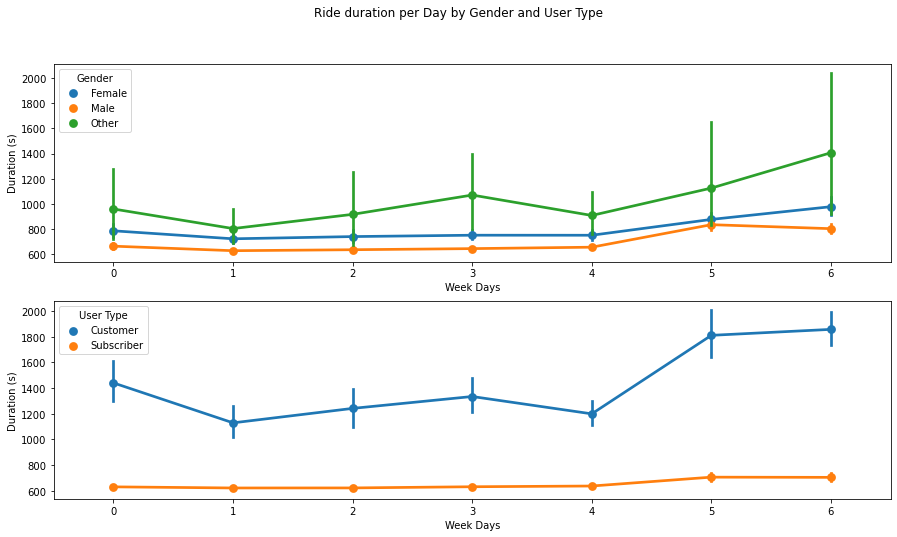

In [193]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
ax = sb.pointplot(data=fordgobike_clean, x='weekday' , y='duration_sec', hue='member_gender')
plt.xlabel('Week Days')
plt.ylabel('Duration (s)')
ax.legend(title='Gender')

plt.subplot(2, 1, 2)
ax = sb.pointplot(data=fordgobike_clean, x='weekday' , y='duration_sec', hue='user_type')
plt.xlabel('Week Days')
plt.ylabel('Duration (s)')
fig.suptitle('Ride duration per Day by Gender and User Type')
ax.legend(title='User Type')
plt.show()

The plot show that the duration for gender is stable in the begening of week, but an remarkable increase happen in weekend.  
For subscriber the duration is keep stable in all the week while the duration of customer increase in weekend.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * The female customers has a higher duration than other.  
> * The younger people are the most who use the Ford GoBike, and they are active more active at 8 am and 5 pm.  
> * The highest frequencies of rides are is in the middle of the week but the longuest rides are in the weekend. Maybe the rides of the midlle of the week are for professional business instead of rides of weekend that are for promenade and picnic.  

### Were there any interesting or surprising interactions between features?

> I was suprprising that the subscriber duration is less, we need more data to investigate the reason behind that.